Done. You have the matrices PP QQ  RR  SS  WW.
 
PP
(2, 2)
[[ 0.9612 -0.    ]
 [ 0.0093  1.    ]]
 
RR
(4, 2)
[[ 0.0951  0.3969]
 [-0.9333 -0.    ]
 [ 0.36    0.    ]
 [ 0.9622 -0.    ]]
 
QQ
(2, 2)
[[ 0.029  -0.974 ]
 [ 0.0097  1.474 ]]
 
SS
(4, 2)
[[  0.1323  -9.1524]
 [  1.4453 -48.5782]
 [  1.       0.    ]
 [  0.0283  -0.9502]]
 
  
Done. You have the matrices "Resp_mat" and "Resp_mat_named" 
which contains impulse reponses to 1% innovations
for all exogenous stochastic processes in the model.
If you want, you can download these into an excel file
or use them to make plots.
   
Resp_mat_named = 
[['Period' '0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0'
  '10.0' '11.0' '12.0']
 ['capital ' '0.028976922036097644' '0.055381788109643185'
  '0.07938673912780511' '0.10115362131858159' '0.12083456638119407'
  '0.13857254009327483' '0.15450186105029767' '0.16874869112511862'
  '0.1814314991524376' '0.19266149926423187' '0.20254306522752494'
  '0.21117412206503444' '0.21864651

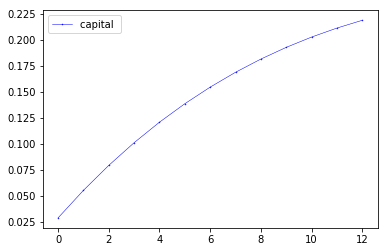

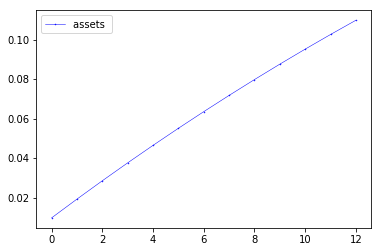

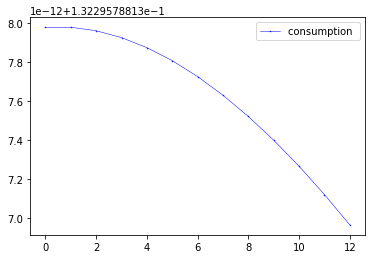

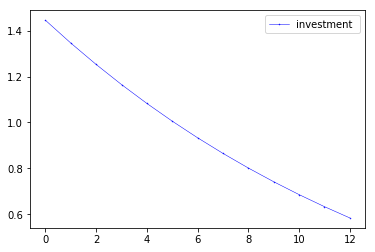

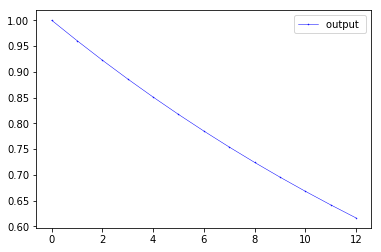

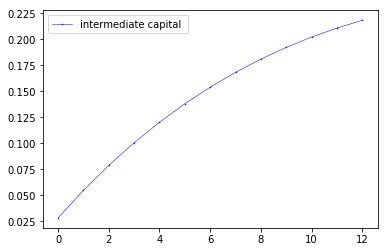

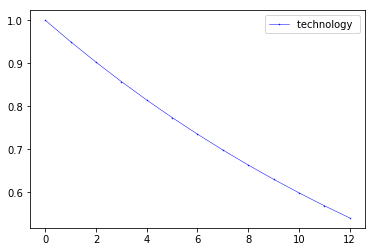

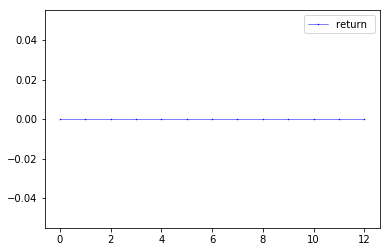

Set of Impulse Responses
x-axis: time periods,  y-axis:  %-deviation from steady state


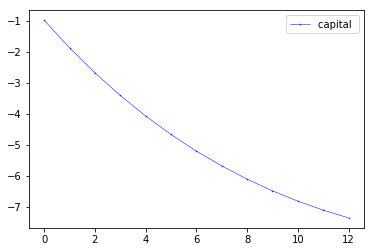

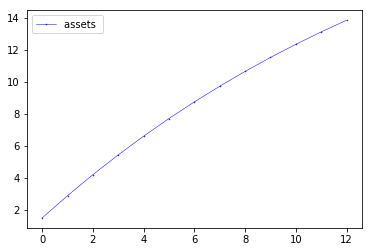

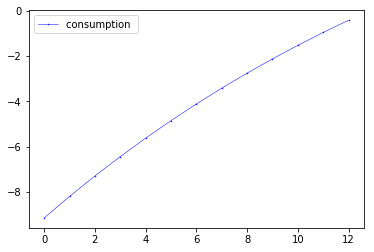

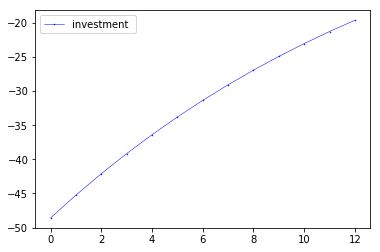

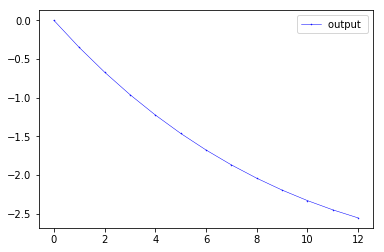

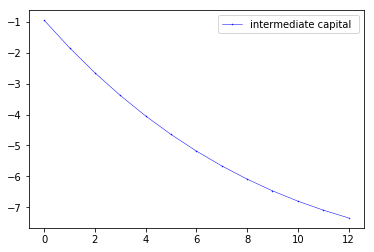

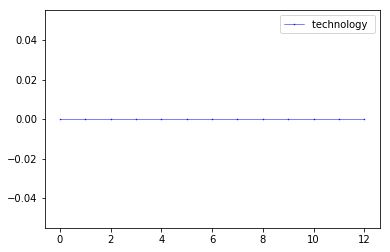

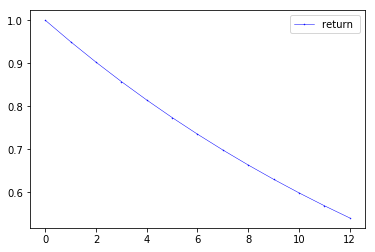

Set of Impulse Responses
x-axis: time periods,  y-axis:  %-deviation from steady state


In [2]:
#  Uhlig's Exampl6.m
#  A Small Open Economy Stochastic Neoclassical 
#  Growth Model with Adjustment Costs for Capital

import numpy as np

Z_bar = 1
NPV_frac = 0.5
rho = 0.36
delta = 0.025
R_bar = 1.01
eta = 1.0
theta = 0.8
psi_z = 0.95
sigma_z = 0.712
psi_r = 0.95
sigma_r = 1.0
corr_z_r = 0

betta = 1.0/R_bar
XK_bar = ((1+delta)**theta - 1)**(1.0/theta)
FK_omt = (1+delta)**(1-theta)
FX_omt = FK_omt/XK_bar**(1-theta)
YK_bar = (R_bar - FK_omt + delta)/(rho*FX_omt)
K_bar = (Z_bar/YK_bar)**(1.0/(1-rho))
Y_bar = Z_bar*K_bar**rho
X_bar = XK_bar*K_bar
F_bar = (1+delta)*K_bar
A_bar = NPV_frac * (Y_bar/(R_bar - 1))
C_bar = Y_bar - X_bar + (R_bar - 1)*A_bar

VARNAMES = ['capital ',
                         'assets ',
                         'consumption ',
                         'investment ',
                         'output ',
                         'intermediate capital ',
                         'technology ',
                         'return ' ]

AA = np.vstack(([ 0, -A_bar],
                           [0, 0], 
                           [-1, 0],    
                           [0, 0]))

BB = np.vstack(([0, R_bar*A_bar],
                           [rho, 0],
                           [-delta, 0],       
                           [K_bar**theta, 0]))

CC = np.vstack(([ -C_bar, -X_bar, Y_bar, 0],
                           [0, 0, -1, 0],
                           [0, 0, 0,(1+delta)],
                           [0, X_bar**theta, 0, (-F_bar**theta) ]))


DD = np.vstack(([0,R_bar*A_bar],
                           [1,0],
                           [0,0],          
                           [0,0]))

FF = np.vstack(([0,0], 
                          [0,0]))

GG = np.vstack(([0, 0],
                           [(-((rho/R_bar)*YK_bar*FX_omt + (1-theta)*FK_omt/R_bar) ),0]))

HH = np.vstack(([0,0],
                           [0,0]))

JJ = np.vstack(([-eta, 0, 0, 0],     
                          [-eta,(1-theta)*(FK_omt-delta)/R_bar,(rho/R_bar)*YK_bar*FX_omt,delta*(1-theta)/R_bar]))

KK = np.vstack(([eta, 0, 0, 0],
                           [eta,theta-1,0,1-theta]))

LL = np.vstack(([0,1],
                          [0,0]))

MM = np.vstack(([0,0],
                            [0,0]))

NN = np.vstack(([psi_z, 0],
                           [0, psi_r ]))

Sigma = np.vstack(([sigma_z**2, corr_z_r*sigma_z*sigma_r], 
                                [corr_z_r*sigma_z*sigma_r, sigma_r**2]))

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

print(' ')
print('PP')
print(PP.shape)
print(PP)
print(' ')
print('RR')
print(RR.shape)
print(RR)
print(' ')
print('QQ')
print(QQ.shape)
print(QQ)
print(' ')
print('SS')
print(SS.shape)
print(SS)
print(' ')


%run Uhlig_impulse_resp_all.ipynb

%run Uhlig_plot_impresp_all.ipynb

